# Check model parameters

In [2]:
%load_ext autoreload
%autoreload 2

In [235]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from skimage.transform import downscale_local_mean

from model import MultiLayerPerceptron

In [4]:
model_L14 = MultiLayerPerceptron(5, 128, 30)
model_L28 = MultiLayerPerceptron(5, 128, 58)

In [5]:
checkpoint_L14 = torch.load("best-model-L14.pth", map_location=torch.device('cpu'))
checkpoint_L28 = torch.load("best-model-L28.pth", map_location=torch.device('cpu'))

model_L14.load_state_dict(checkpoint_L14["model_state_dict"])
model_L28.load_state_dict(checkpoint_L28["model_state_dict"])

<All keys matched successfully>

In [225]:
weights0_L14 = model_L14.layers[0].weight.detach().numpy()
weights0_L28 = model_L28.layers[0].weight.detach().numpy()

print(weights0_L14.shape)


(128, 30)


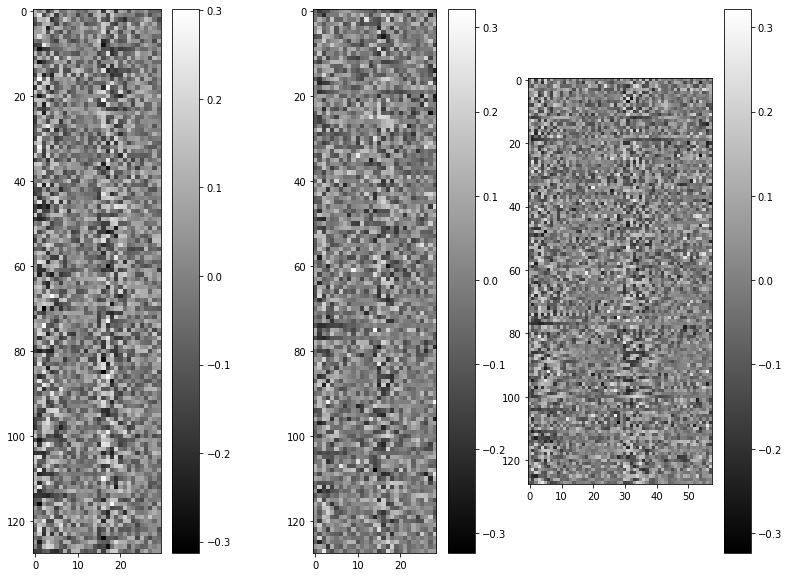

In [227]:
fig = plt.figure(figsize=(14,10))

plt.subplot(1,3,1)
plt.imshow(weights0_L14, cmap='gray', label='weights L14')
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(weights0_L28, cmap='gray', label='weights L28')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(weights0_L28[:,::2], cmap='gray', label='weights L28 reduced (mean)')
plt.colorbar()

In [223]:
np.arange(20)[::2]




array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [90]:
data_l14 = np.load('dataset/train_data_L14.npz')['speckleF']
data_l28 = np.load('dataset/train_data_L28.npz')['speckleF']
data_l28_real = np.load('dataset/train_data_L28.npz')['speckleR']

(256,)


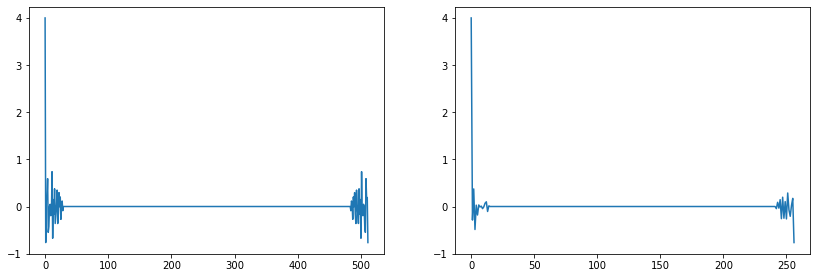

In [191]:
f_v = data_l28[0,:]
f_v_trunc = np.fft.fftshift(f_v)

f_v_naive_red = f_v[::2]

f_v_reduced = (f_v[1:])
f_v_reduced = (f_v_reduced[::2] + np.append(f_v_reduced, f_v_reduced[-1])[1::2]) / 2
f_v_reduced = np.append(f_v[0], f_v_reduced)

idx = np.zeros_like(f_v, dtype=bool)
idx[:8] = 1
idx[-7:] = 1
idx[256-120:256+121] = 1
f_v_trunc = f_v[idx]
print(f_v_trunc.shape)
idx[60] = 1
f_v_trunc_big = np.append(f_v[0], f_v[np.logical_not(idx)])

fig = plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.plot(f_v, label='Fourier speckle')

plt.subplot(2,2,2)
plt.plot(f_v_reduced, label='fourier speckle reduce')


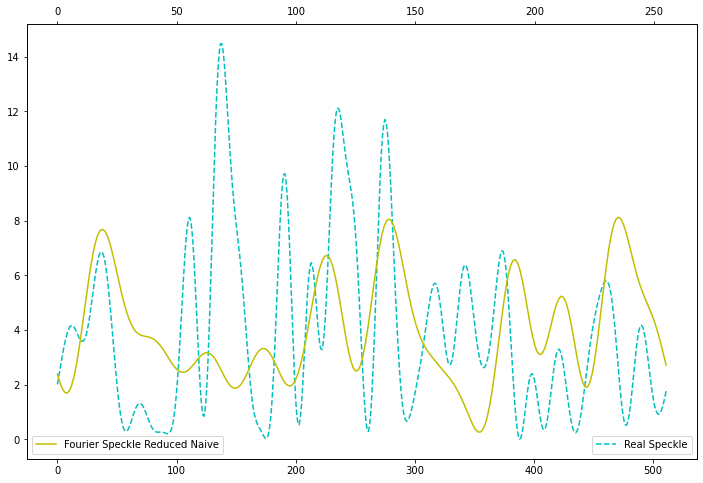

In [233]:
# plot f(x)=x for two different x ranges
x1 = np.arange(512)
x2 = np.arange(256)
y1 = np.fft.fft(f_v_trunc)
y2 = np.fft.fft(f_v_reduced[:-1])
y3 = data_l28_real[0,:]
y4 = np.fft.fft(f_v_naive_red)
y5 = np.fft.fft(f_v_trunc_big)

fig = plt.figure(figsize=(12,8))

# ax1 = fig.add_subplot(111)
# ax1.plot(x2, y1,'g-', label='Fourier Speckle Trunc k<<1')
# plt.legend(loc='upper left')

# ax2 = ax1.twiny()
# ax2.plot(x2, y2, 'y-', label='Fourier Speckle Reduced')
# plt.legend(loc='upper left')

ax1 = fig.add_subplot(111)
ax1.plot(x1, y3, 'c--', label='Real Speckle')
plt.legend(loc='lower right')

ax2 = ax1.twiny()
ax2.plot(x2, y4, 'y-', label='Fourier Speckle Reduced Naive')
plt.legend(loc='lower left')

# ax5 = fig.add_subplot(111)
# ax5.plot(x2, y5,'r-', label='Fourier Speckle Trunc k>>0')
# plt.legend(loc='upper right')

plt.show()

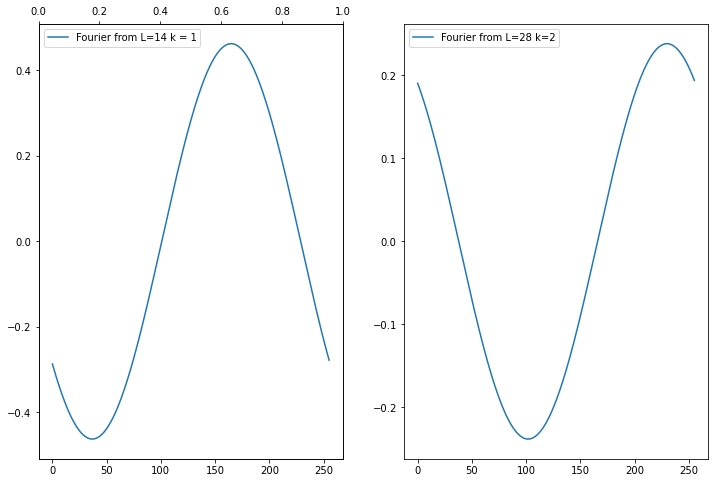

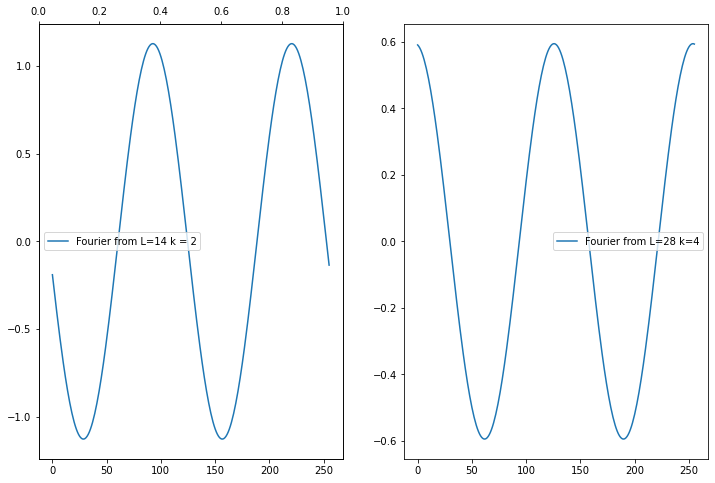

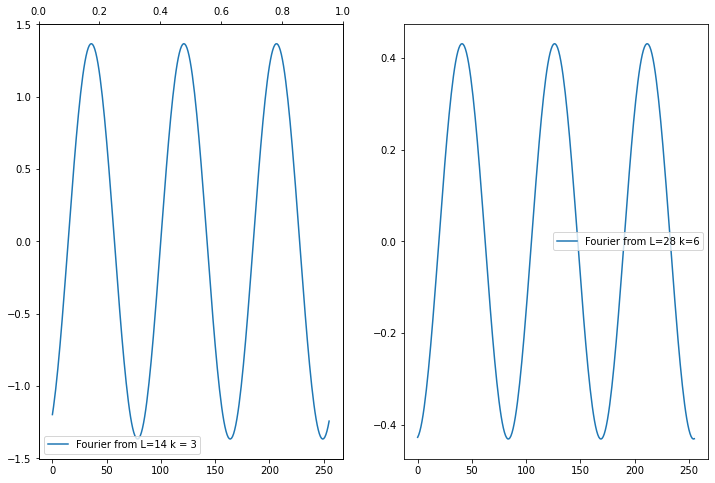

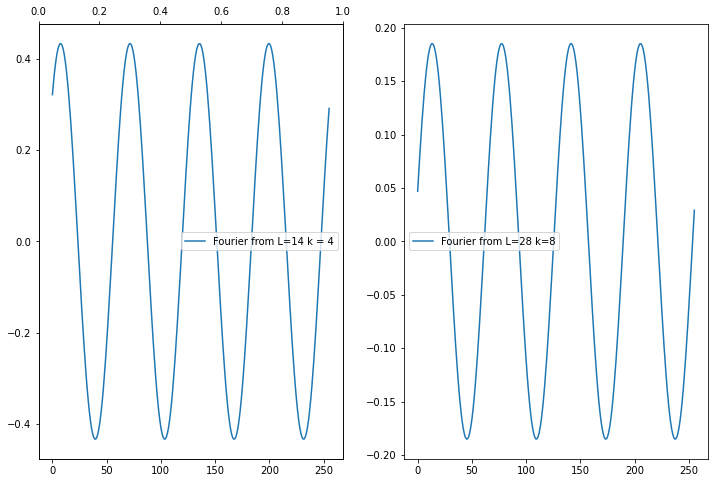

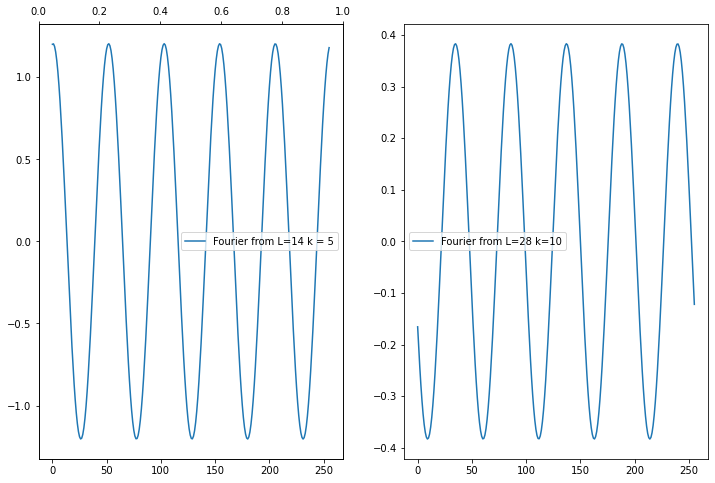

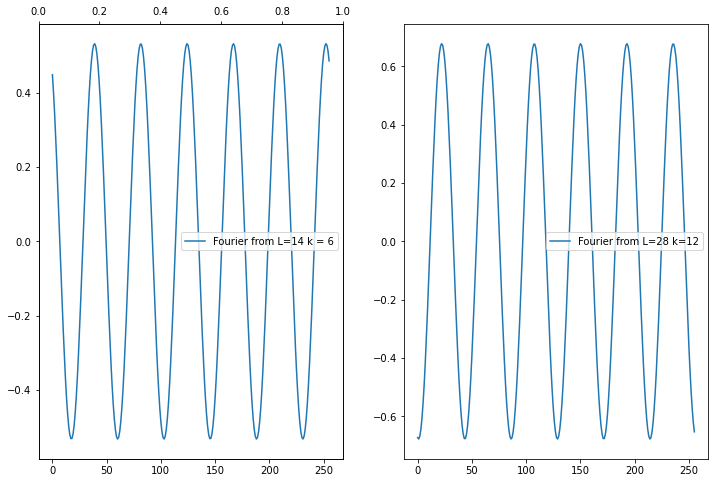

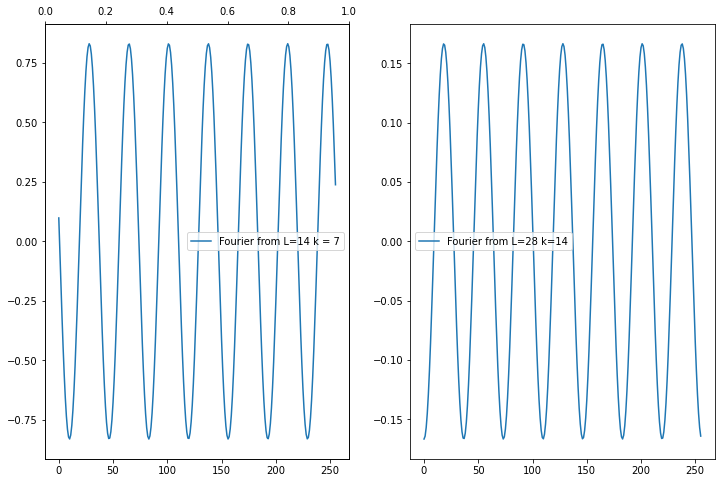

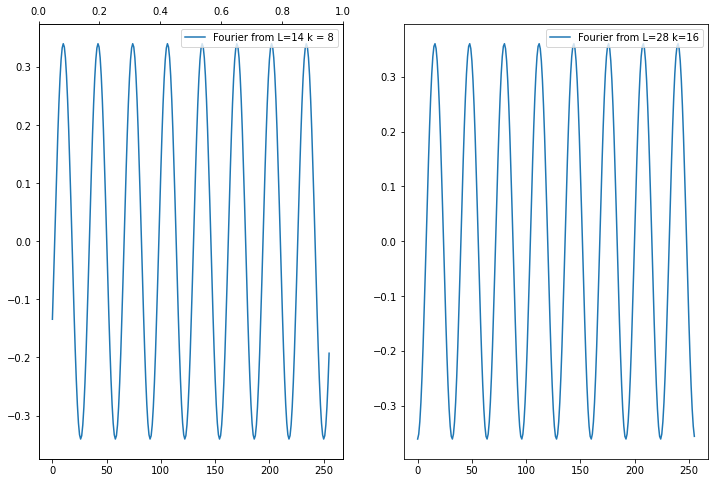

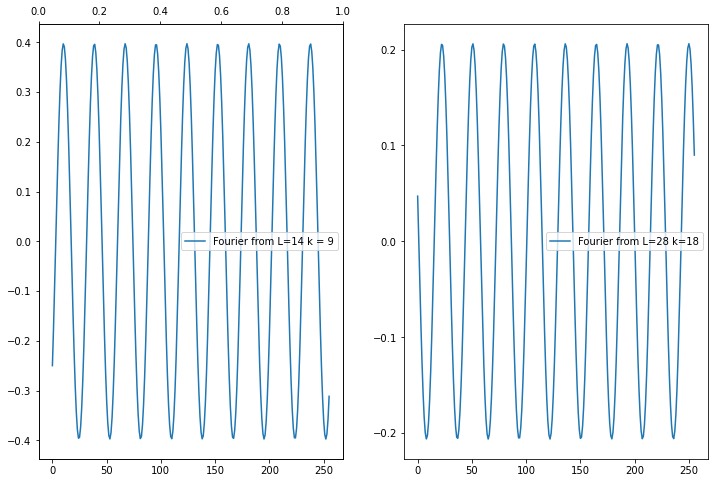

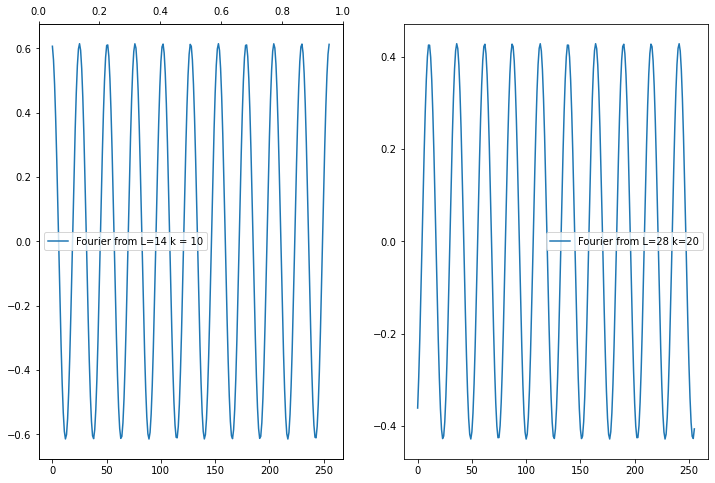

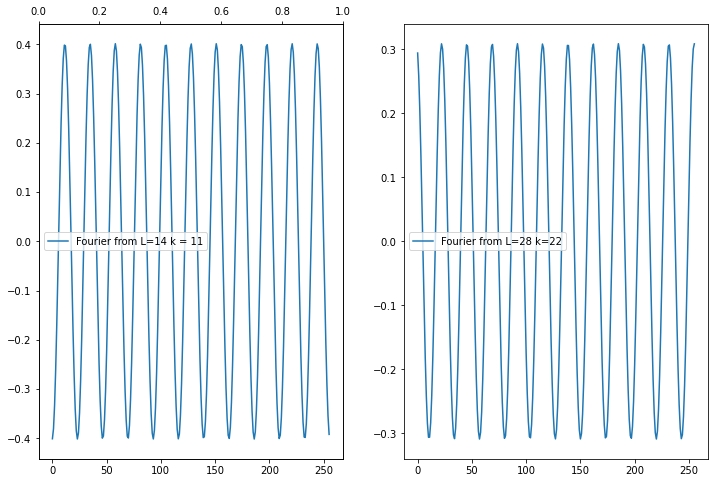

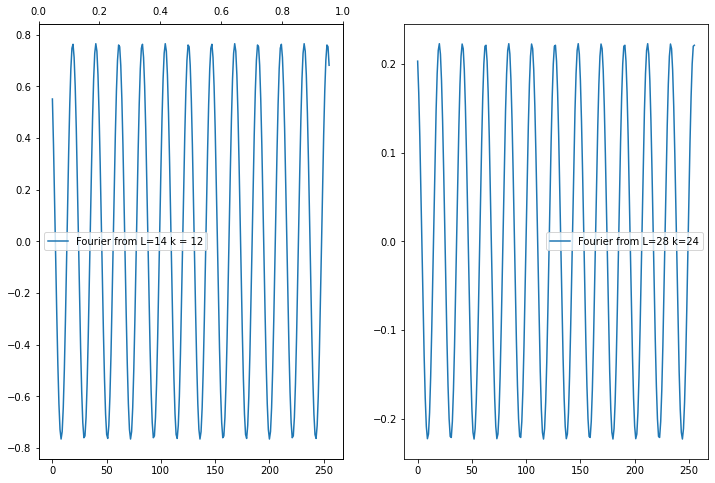

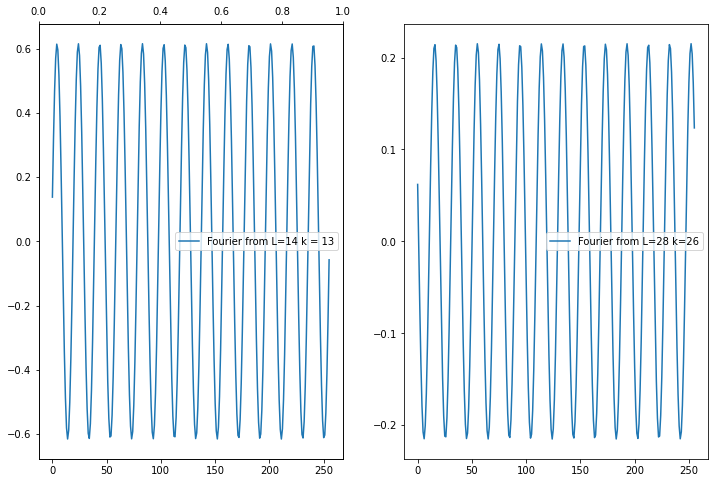

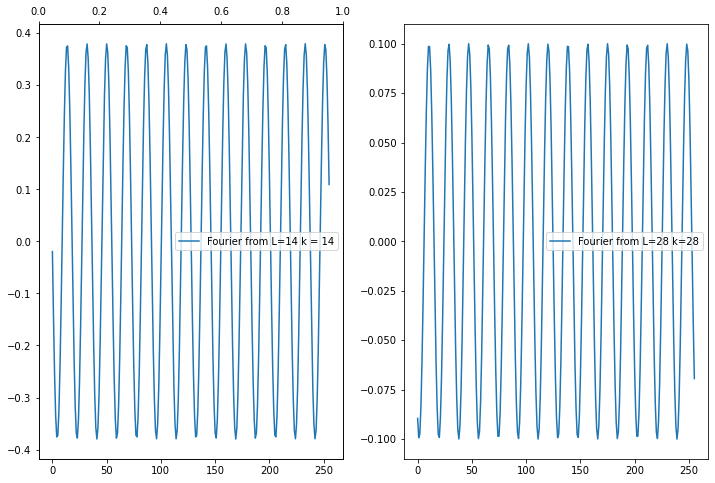

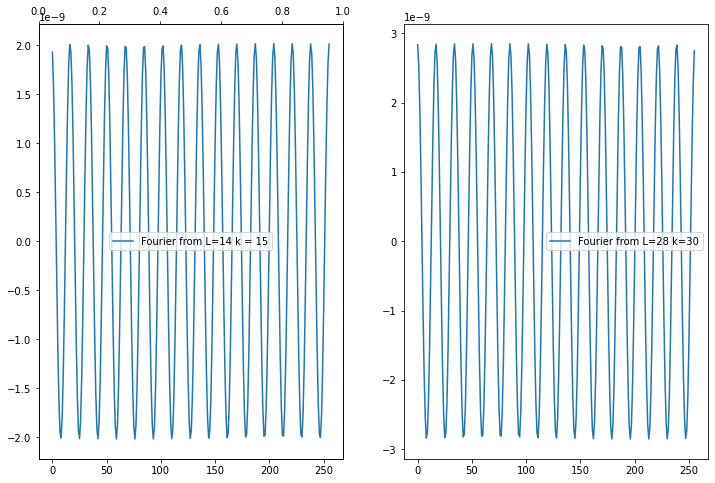

In [219]:
f_v14 = data_l14[0,:]
f_v28 = data_l28[0,:]

for k in range(1, 16):
    idx14 = np.ones_like(f_v14, dtype=bool)
    idx14[k] = 0
    f_v_k14 = np.copy(f_v14)
    f_v_k14[idx14] = 0
    idx28 = np.ones_like(f_v28, dtype=bool)
    idx28[2*k] = 0
    f_v_k28 = np.copy(f_v28)
    f_v_k28[idx28] = 0


    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(121)
    plt.plot(x2, np.fft.fft(f_v_k14), label='Fourier from L=14 k = {}'.format(k))
    plt.legend()

    ax2 = ax1.twiny()
    ax2 = fig.add_subplot(122)
    ax2.plot(x1[:256], np.fft.fft(f_v_k28)[:256], label='Fourier from L=28 k={}'.format(2*k))
    plt.legend()
    
    plt.show()

In [234]:
checkpoint = torch.load("best-model.pth", map_location=torch.device('cpu'))